In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/banknotes.csv')
df.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [4]:
df.describe()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


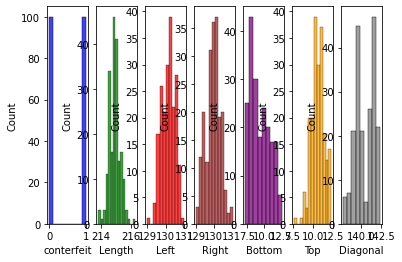

In [5]:
fig,(ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows= 1, ncols=7)
sns.histplot(x = "conterfeit", data = df, color = 'blue' , ax = ax1)
sns.histplot(x = "Length", data = df, color = 'green', ax = ax2)
sns.histplot(x = "Left", data = df, color = 'red', ax = ax3)
sns.histplot(x = "Right", data = df, color = 'brown', ax = ax4)
sns.histplot(x = "Bottom", data = df, color = 'purple', ax = ax5)
sns.histplot(x = "Top", data = df, color = 'orange', ax = ax6)
sns.histplot(x = "Diagonal", data = df, color = 'grey' , ax =ax7);

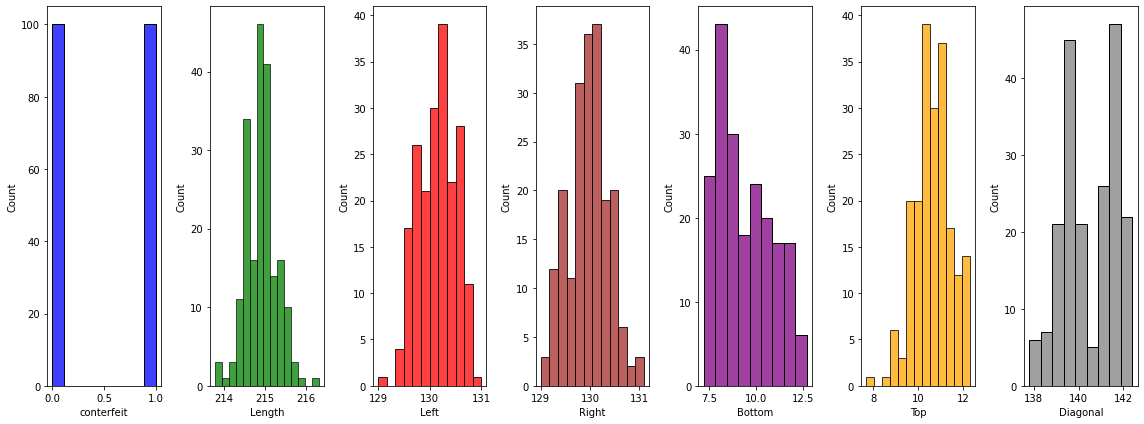

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16, 6))

column_names = ["conterfeit", "Length", "Left", "Right", "Bottom", "Top", "Diagonal"]
colors = ['blue', 'green', 'red', 'brown', 'purple', 'orange', 'grey']

for i, column in enumerate(column_names):
    sns.histplot(x=column, data=df, color=colors[i], ax=axes[i])


plt.tight_layout()
plt.show()


# outlier detection in Lenght feature

mean =  214.896
std div =  0.37655406626953336
minimum value =  213.8
maximum value =  216.3


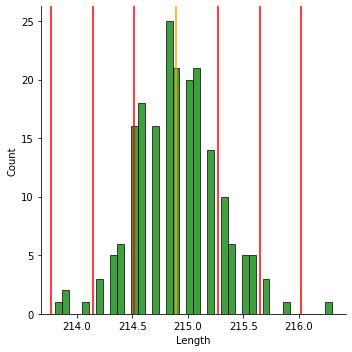

In [7]:
mu_length = df["Length"].mean()
sigma_length = df['Length'].std()
minimum_length = df['Length'].min()
maximum_length = df['Length'].max()


print("mean = ", mu_length)
print("std div = ", sigma_length)
print("minimum value = ", minimum_length)
print("maximum value = ", maximum_length)


sns.displot(x = "Length", data = df, kind = "hist", bins = 40, color = 'green')
plt.axvline(df['Length'].mean(), color  = 'orange')
for i in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu_length + i*sigma_length, color = 'red')
    
    
plt.show()

In [8]:
lower_limit_length = mu_length - 3* sigma_length
upper_limit_length = mu_length + 3* sigma_length
print('lower limit', lower_limit_length)
print('upper limit', upper_limit_length)

lower limit 213.76633780119138
upper limit 216.0256621988086


In [9]:
df[(df['Length'] > upper_limit_length) | (df['Length'] < lower_limit_length)]

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
166,1,216.3,130.7,130.4,10.0,10.1,138.8


In [10]:
df.drop(166, axis= 0, inplace=True)

# outlier in left feature

mean =  130.1185929648241
std div =  0.3595817297281627
maximum value =  131.0
minimum value =  129.0


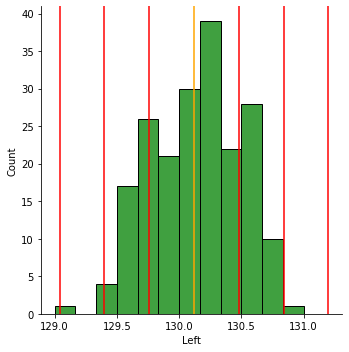

In [11]:
mu_left = df["Left"].mean()
sigma_left = df["Left"].std()
maximum_left = df["Left"].max()
minimum_left = df["Left"].min()



print("mean = ", mu_left)
print("std div = ", sigma_left)
print("maximum value = ", maximum_left)
print("minimum value = ", minimum_left)



sns.displot(x = "Left", data = df, kind = "hist", color = "green")
plt.axvline(mu_left, color = "orange")
for i in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu_left + i*sigma_left, color = "red")
    
plt.show()

In [14]:
upper_limit_left = mu_left + 3 * sigma_left
lower_limit_left = mu_left - 3 * sigma_left

print("upper limit", upper_limit_left)
print("lower limit", lower_limit_left)

upper limit 131.1973381540086
lower limit 129.0398477756396


In [15]:
df[(df["Left"] > upper_limit_left) | (df["Left"] < lower_limit_left)]

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
49,0,214.5,129.0,129.6,7.8,9.8,142.0


In [16]:
df.drop(49,axis =0 ,inplace=True)

# Outlier in right feature

mean =  129.9560606060606
std div =  0.40408904427010056
maximum value =  131.1
minimum value =  129.0


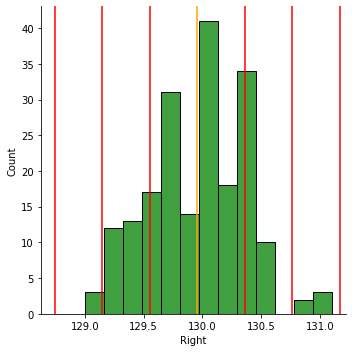

In [21]:
mu_right = df["Right"].mean()
sigma_right = df["Right"].std()
maximum_right = df["Right"].max()
minimum_right = df["Right"].min()


print("mean = ", mu_right)
print("std div = ", sigma_right)
print("maximum value = ", maximum_right)
print("minimum value = ", minimum_right)


sns.displot(x = "Right", data = df, kind = "hist", color = "green")
plt.axvline(mu_right, color = "orange")
for i in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu_right + i * sigma_right, color = "red")

    
plt.show()